In [1350]:
import pandas as pd

# Leer el archivo CSV
file_path = r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\datos_prueba_técnica- Data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
display(data.head())


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,bogota,2ddadeec-878a-4053-889f-73fdd8e9c4b3,MercadoLibre,MCO-1550457973,APARTAMENTO,FOR_SALE,CUNDINAMARCA,Usaquén,Oportunidad única de inversión!,NaN,5,-74,30,NaN,1,1,0,235000000,NaN,NaN,COP,4,"267,000",False,"2,023",USED,2025-04-21,NaN,https://apartamento.mercadolibre.com.co/MCO-1550457973-vendo-apartaestudio-n...,Oportunidad única de inversión! Se vende moderno apartamento tipo estudio de...,NaN,10,NaN,2025-04-21 00:00:00,2025-04-21
1,BOGOTÁ,9dab8777-c6ea-49af-aae1-46a0c5c31080,Fincaraiz,191885592,Apartamento,FOR_SALE,Cundinamarca,Antonio Nariño,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona centro, Antonio nariño, San antonio de padua, Cal...",5,-74,110,NaN,4,2,0,380000000,"92,283","4,118",COP,3,NaN,NaN,"2,002",-,2025-01-18,2025-01-16,http://fincaraiz.com.co/apartamento-en-venta/191885592,LINDO APARTAMENTO excelente estado area 100 M2 cocina integral independie...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaN
2,Bogota DC,c4f1f212-8a33-48cc-8eda-da6cd9c0f7c1,Fincaraiz,7030790,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,"Bodega en venta, Bogotá - Restrepo","Bogotá, d.c., Bogotá, Zona centro, Antonio nariño, Restrepo occidental, TRAN...",5,-74,822,NaN,1,3,0,1650000000,"402,724","4,097",COP,3,NaN,NaN,"2,001",USED,2023-08-02,2022-02-08,http://fincaraiz.com.co/bodega-en-venta-bogota-restrepo/7030790,Bodega de tres Niveles primer Nivel un local dos alcobas un baño área li...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,bogota,e615bab1-ca59-47ed-a284-42aba0fb64a3,Fincaraiz,191273166,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,Casa en Venta,"Bogotá, d.c., Bogotá, Zona sur, Antonio nariño, Eduardo frey, Carrera 34 #29...",5,-74,472,NaN,12,9,2,850000000,"207,464","4,097",COP,3,NaN,NaN,"2,002",-,2024-09-14,2024-08-28,http://fincaraiz.com.co/casa-en-venta/191273166,Atos Inmobiliaria presenta una oportunidad excepcional de inversión con la v...,NaN,4,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,bogota,9f45a3d8-e16d-4d8b-bb6d-3ec0c320284f,CienCuadras,2490882,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,"Casa en Venta en La Fraguita, Antonio Nariño, Bogotá, Cundinamarca","Calle 10A Sur #24-26,",5,-74,"1,750",NaN,10,6,2,715000000,"174,514","4,097",COP,3,NaN,NaN,"2,014",USED,2022-09-29,2022-09-28,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-fraguita-bogotá-249...,casa ubicada en la fraguita 5 niveles 1 nivel consta de 2 garajes ingreso ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15


In [1351]:
pd.set_option("display.float_format", "{:,.6f}".format)

In [1352]:
data.shape

(140000, 35)

# EDA

## Normalizacion 

In [1353]:
data.columns


Index(['ciudad', 'id', 'portal_inmobiliario', 'codigo_web', 'tipo_inmueble', 'tipo_negocio', 'departamento', 'subzona', 'nombre_publicacion', 'direccion', 'latitud', 'longitud', 'area', 'area_total', 'habitaciones', 'banios', 'parqueaderos', 'precio_venta', 'precio_usd', 'tasa_de_cambio', 'moneda_precio_publicado', 'estrato', 'precio_admon', 'precio_admon_incluido', 'anhio_construccion', 'condicion', 'fecha_insercion_third_party', 'fecha_publicacion', 'url', 'descripcion', 'pisos_edificio', 'piso', 'ascensor', 'fecha_insercion_interna', 'last_edited'], dtype='object')

In [1354]:
import pandas as pd

# 1) Normalizar tu columna 'ciudad' a minúsculas, sin espacios/puntos extra ni acentos
ciudad_clean = (
    data['ciudad']
      .astype(str)                               # forzar string
      .str.strip()                               # quitar espacios al inicio/final
      .str.normalize('NFKD')                     # separar caracteres + acentos
      .str.encode('ascii', errors='ignore')      # eliminar acentos
      .str.decode('utf-8')                       # volver a texto
      .str.lower()                               # todo minúsculas
      .str.replace(r'\.', '', regex=True)        # quitar puntos
      .str.replace(r'\s+', ' ', regex=True)      # colapsar espacios múltiples
)

# 2) Mapear las variantes limpias a tu valor canónico
mapeo = {
    'bogota':      'Bogota DC',
    'bogota dc':   'Bogota DC',
}

# 3) Aplicar el mapeo, dejando intactos los que no estén en él
data['ciudad'] = ciudad_clean.map(mapeo).fillna(data['ciudad'])

# 4) Verifica el resultado
print(data['ciudad'].unique())


['Bogota DC']


In [1355]:
data['estrato'].unique()


array([  4,   3,   5,   6,   2,   1,   7, 110,   8, 100])

In [1356]:
data['departamento'].unique()

array(['CUNDINAMARCA', 'Cundinamarca'], dtype=object)

In [1357]:

data['departamento'] = data['departamento'].str.lower()

In [1358]:
data['tipo_inmueble'].unique()

array(['APARTAMENTO', 'Apartamento', 'Casa'], dtype=object)

In [1359]:

data['tipo_inmueble'] = data['tipo_inmueble'].str.lower()

In [1360]:
pd.set_option("display.float_format", "{:,.6f}".format)


In [1361]:
data['latitud']  = pd.to_numeric(data['latitud'], errors='coerce')
data['longitud'] = pd.to_numeric(data['longitud'], errors='coerce')

# Aplicar formato visual a 6 decimales sin perder precisión
data['latitud']  = data['latitud'].map(lambda x: round(x, 6) if pd.notnull(x) else x)
data['longitud'] = data['longitud'].map(lambda x: round(x, 6) if pd.notnull(x) else x)


In [1362]:
# Normalizar fechas
data['fecha_publicacion'] = pd.to_datetime(data['fecha_publicacion'], dayfirst=True, errors='coerce')
data['last_edited'] = pd.to_datetime(data['last_edited'], errors='coerce')


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\2542495764.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['fecha_publicacion'] = pd.to_datetime(data['fecha_publicacion'], dayfirst=True, errors='coerce')


In [1363]:
data['precio_venta'] = (
    data['precio_venta']
    .astype(str)
    .str.replace(',', '', regex=False)  # Elimina las comas
    .replace('', np.nan)
    .astype(float)
)


In [1364]:
import pandas as pd

# 1) Convierte a numérico; todo lo que no pueda convertirse pasa a NaN
data['anhio_construccion'] = pd.to_numeric(
    data['anhio_construccion'],
    errors='coerce'        # valores no numéricos → NaN
)

# 2) Cámbialo al tipo entero nullable de pandas
data['anhio_construccion'] = (
    data['anhio_construccion']
    .round()               # por si llega algún decimal (opcional)
    .astype('Int64')       # entero que admite <NA>
)

# 3) (Opcional) Verifica el resultado
print(data['anhio_construccion'].dtype)   # → Int64
print(data['anhio_construccion'].head())


Int64
0    2023
1    2002
2    2001
3    2002
4    2014
Name: anhio_construccion, dtype: Int64


 ### Identificar y eliminar duplicados utilizando criterios inteligentes (no solo por ID).

## Filtros limpieza

#### Filtro fuerte - por ID

In [1365]:
import pandas as pd

# 1) Encuentra todos los IDs que están repetidos
ids_duplicados = data['id'][data['id'].duplicated(keep=False)].unique()

# 2) Filtra el DataFrame manteniendo solo los grupos con esos IDs repetidos
duplicados_por_id = (
    data
    .groupby('id', group_keys=False)
    .filter(lambda grp: len(grp) > 1)
    .sort_values('id')
    .reset_index(drop=True)
)

# 3) Echa un vistazo a las filas con IDs duplicados
display(duplicados_por_id)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,0001cc78-e719-4aa8-9f86-ed7cb14f633a,CienCuadras,2221800,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en GARCES NAVES OCCIDENTAL, Bogotá",CARRERA 109 79A- 09,4.715817,-74.117849,243.000000,NaN,8,3,0,"390,000,000.000000","95,189.280000","4,097.100000",COP,3,NaN,NaN,2002,USED,2022-01-13,2022-01-12,https://www.ciencuadras.com/inmueble/casa-en-venta-en-garces-naves-occidenta...,Casa de tres pisos iluminada entra el sol en las tardes ubicada en el ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139993,Bogota DC,fffbedd1-47d8-41b7-9a11-19d198f8ee3e,Metro Cuadrado,16305-M5564882,casa,FOR_SALE,cundinamarca,Suba,"Casa en Venta, San Cayetano, Bogotá D.C.","Bogotá D.C., Noroccidente, Altos de Suba y Cerros de San Jorge, SAN CAYETANO...",4.724255,-74.098310,300.000000,NaN,5,5,2,"525,000,000.000000","128,139.420000","4,097.100000",COP,3,NaN,NaN,2005,USED,2025-02-08,NaT,https://www.metrocuadrado.com/inmueble/venta-casa-bogota-san-cayetano-5-habi...,Casa en venta en Suba - San Cayetano esquinera y rentable a media cuadra de ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
139994,Bogota DC,fffcb79c-73fb-4fe3-8cce-297221e47a3a,Metro Cuadrado,16285-M5462609,casa,FOR_SALE,cundinamarca,Puente Aran

In [1366]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Para cada grupo de 'id', ordenar de más reciente a más antiguo y quedarnos con la fila más nueva
data_sin_duplicados = (
    data
    .groupby('id', group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 3) Verifica el resultado
print(f"Filas originales: {data.shape[0]} → Filas tras eliminar duplicados: {data_sin_duplicados.shape[0]}")
display(data_sin_duplicados)


Filas originales: 140000 → Filas tras eliminar duplicados: 70001


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\547559857.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,0001cc78-e719-4aa8-9f86-ed7cb14f633a,CienCuadras,2221800,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en GARCES NAVES OCCIDENTAL, Bogotá",CARRERA 109 79A- 09,4.715817,-74.117849,243.000000,NaN,8,3,0,"390,000,000.000000","95,189.280000","4,097.100000",COP,3,NaN,NaN,2002,USED,2022-01-13,2022-01-12,https://www.ciencuadras.com/inmueble/casa-en-venta-en-garces-naves-occidenta...,Casa de tres pisos iluminada entra el sol en las tardes ubicada en el ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,0001e5d5-3b79-4209-9443-97222ebc51ab,Fincaraiz,192005899,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona norte, Suba, Santa Maria de Suba, Colegio Veintiu...",4.748945,-74.080580,50.000000,NaN,2,1,0,"145,000,000.000000","35,390.890000","4,097.100000",COP,2,NaN,NaN,2005,-,2025-02-15,2025-02-12,http://fincaraiz.com.co/apartamento-en-venta/192005899,Apartamento en Suba Tuna Alta 50m2 $145 millones negociables; 2do piso que c...,NaN,2.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,00020451-c3fc-484b-9456-f1527e57ef1e,Metro Cuadrado,800-M4945046,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, BRITALIA, Bogotá D.C.","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR BONAVISTA 170, BRITALIA",4.753947,-74.063130,77.000000,NaN,3,2,1,"432,500,000.000000","105,562.470000","4,097.100000",COP,4,"323,400.000000",False,2004,USED,2024-05-09,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-bonavist...,Apartamento en venta de 77 m² con vista interior ubicado en un 7mo piso (T...,NaN,7.000000,NaN,2025-03-20 14:07:51.650993,2025-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,Bogota DC,fff8ebed-f921-461c-9f45-78f29ef581f0,Fincaraiz,191986071,apartamento,FOR_SALE,cundinamarca,Engativá,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, San Marcos, Villa luz, Carrera 77b,...",4.685069,-74.105254,65.000000,NaN,3,2,1,"275,000,000.000000","67,120.650000","4,097.100000",COP,3,NaN,NaN,2002,-,2025-02-08,2025-02-07,http://fincaraiz.com.co/apartamento-en-venta/191986071,Vendo apartamento excelentemente ubicado cerca a ejes viales como Av Ciudad ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69997,Bogota DC,fffa6151-71bb-47c8-9701-66f60fc0e0a0,Fincaraiz,10802926,casa,FOR_SALE,cundinamarca,Rafael Uribe,Casa 

### Filtro fuerte - por varias categorias - 11

In [1367]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'habitaciones',
        'banios',
        'parqueaderos',
        'subzona',
        'direccion'
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'habitaciones',
        'banios',
        'parqueaderos',
        'subzona',
        'direccion'
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,216aec63-d1c0-43b2-9e8b-30e9d33d45f2,CienCuadras,1538408,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en GARCES NAVES OCCIDENTAL, Bogotá",CALLE 75 110A- 39,4.713269,-74.123799,50.000000,NaN,3,1,0,"182,000,000.000000","44,421.660000","4,097.100000",COP,2,"142,000.000000",False,1990,USED,2024-02-17,2020-03-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-garces-naves-oc...,Excelente apartamento ubicado en zona residencial cerca al colegi...,NaN,4.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,3984b3a6-9877-4509-83e1-ee703c90e634,CienCuadras,1538408,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en EL MORTIÑO, Bogotá",CALLE 75 110A- 39,4.713269,-74.123799,50.000000,NaN,3,1,0,"172,000,000.000000","41,356.710000","4,158.938480",COP,3,"142,000.000000",False,1990,USED,2024-02-17,2020-03-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-mortiño-bogo...,Excelente apartamento ubicado en zona residencial cerca al colegi...,NaN,4.000000,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,2c81327c-724b-49c7-9cf9-2ff29b458d6b,CienCuadras,2766636,casa,FOR_SALE,cundinamarca,Teusaquillo,"Inmueble en Venta, Casa en Modelia, Bogotá",AC 53 67 35,4.656215,-74.099479,388.370000,NaN,4,3,1,"1,200,000,000.000000","292,890.090000","4,097.100000",COP,3,NaN,NaN,1970,USED,2023-08-17,2024-11-20,https://www.ciencuadras.com/inmueble/casa-en-venta-en-modelia-bogota-2766636,En venta espaciosa casa rentable ubicada en Salitre el Greco. El terreno cue...,2.000000,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,78cfa964-2307-4465-95fc-5530af606294,CienCuadras,2766636,casa,FOR_SALE,cundinamarca,Teusaquillo,"Inmueble en Venta, Casa en El Salitre, Bogotá",AC 53 67 35,4.656215,-74.099479,388.370000,NaN,4,3,1,"1,150,000,000.000000","279,146.540000","4,119.700000",COP,3,NaN,NaN,1970,USED,2023-08-17,2023-08-14,https://www.ciencuadras.com/inmueble/casa-en-venta-en-el-salitre-bogota-2766636,En venta espaciosa casa rentable ubicada en Salitre el Greco. El terreno cue...,2.000000,NaN,NaN,2025-03-20 14:07:51.650993,NaT
4,Bogota DC,2948cd3e-b3ff-47b6-945a-27fd0ddd9dec,CienCuadras,2818392,apartamento,FOR_SALE,cundinamarca,Chapinero,"Inmueble en Venta, Apartamento en Chapinero Alto, Bogotá",TRANSVERSAL 3 51A- 64,4.637852,-74.061132,49.100000,NaN,1,1,1,"375,000,000.000000","91,026.050000","4,119.700000",COP,4,"336,000.000000",False,2013,USED,2023-10-05,2023-10-03,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chapinero-alto-...,Apartamento en venta cuneta con buena ubicación cerca a universidades clí...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
5,Bogota DC,79c25759-4ff7-4b84-9698-6a187a2ad02b,CienCuadras,2818392,apartamento,FOR_SALE,cundinamarca,Chapinero,"Inmueble en Venta, Apartamento en Pardo Rubio, Bogotá",TRANSVERSAL 3 51A- 64,4.637852,-74.061132,49.100000,NaN,1,1,1,"400,000,000.000000","97,630.030000","4,097.100000",COP,3,"336,000.000000",False,2013,USED,2023-10-05,2023-10-03,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-pardo-rubio-bog...,Apartamento en venta cuneta con buena ubicación cerca a universidades clí...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
6,Bogota DC,51e3ae39-ebf3-4e93-9a76-98aa7cbf2bbc,CienCuadras,2831598,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en Rincon Del Chicó, Bogotá",CALLE 103A 11B- 49,4.686937,-74.043803,83.230000,NaN,2,2,2,"475,000,000.000000","115,935.660000","4,097.100000",COP,6,"450,000.000000",False,2004,USED,2023-

In [1368]:
import pandas as pd

# Asegúrate de que last_edited sea datetime
data['last_edited'] = pd.to_datetime(data['last_edited'])

# Define tus claves
keys = [
    'portal_inmobiliario', 'codigo_web', 'tipo_inmueble',
    'latitud', 'longitud', 'area', 'habitaciones',
    'banios', 'parqueaderos', 'subzona', 'direccion'
]

# Para cada grupo, ordena por fecha y coge solo la fila más reciente
data_sin_duplicados = (
    data
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# Resultado: un DataFrame con un único registro por grupo, el más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1796894799.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69972,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69973,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro fuerte - por varias categorias 9

In [1369]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'subzona',
        'habitaciones',
        'banios',
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'subzona',
        'habitaciones',
        'banios',
      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,ed44eda0-76d7-4629-9d69-7df030691e14,CienCuadras,2142239,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en VILLA DORADO - SAN ANTONIO, Bogotá",Carrera 110 Bis,4.705350,-74.128062,221.000000,NaN,6,3,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,2,1.000000,False,2022,NEW,2021-12-13,2021-11-02,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-dorado---san-ant...,[VEN] ID HOUM: 43972 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,ba27636b-2fe8-4e68-a529-5c4c15413187,CienCuadras,2142239,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en VILLA DORADO - SAN ANTONIO, Bogotá",Carrera 110 Bis,4.705350,-74.128062,221.000000,NaN,6,3,3,"520,000,000.000000","125,031.900000","4,158.938480",COP,3,1.000000,False,2022,NEW,2021-12-13,2021-11-02,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-dorado---san-ant...,[VEN] ID HOUM: 43972 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,6e94dc9d-b7aa-4d16-8a38-7d07b826d144,CienCuadras,2451476,apartamento,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Apartamento en Rincon Del Chicó, Bogotá",Calle 105a,4.689023,-74.045060,140.000000,NaN,2,2,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,4,"928,900.000000",False,1997,USED,2022-08-15,2022-08-12,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-rincon-del-chic...,[VEN] ID HOUM: 84960 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,f6b34a1a-faf7-42d0-8d68-98bfe9ca2e63,CienCuadras,2451476,apartamento,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Apartamento en Rincon Del Chicó, Bogotá",Calle 105a,4.689023,-74.045060,140.000000,NaN,2,2,1,"630,000,000.000000","151,480.960000","4,158.938480",COP,5,"827,000.000000",False,1998,USED,2022-08-15,2022-08-12,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-rincon-del-chic...,[VEN] ID HOUM: 84960 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,NaT
4,Bogota DC,ea8b6c8d-c6bb-4bc4-9c2c-d015601a797a,CienCuadras,2581994,apartamento,FOR_SALE,cundinamarca,Teusaquillo,"Apartamento en Venta en Quinta Paredes, Teusaquillo, Bogotá, Cundinamarca",Calle 22B #44-05,4.632735,-74.094877,92.000000,NaN,3,2,1,"716,000,000.000000","172,227.170000","4,157.300000",COP,4,NaN,NaN,2023,USED,2023-01-29,2023-01-28,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-quinta-paredes-...,Se vende apartamento quinta paredes\r \r * 3 habitaciones\r * 2 baños\r * zo...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Bogota DC,c28dd3d5-ec26-45be-b74c-29501ca80f8f,Metro Cuadrado,847-M5062736,apartamento,FOR_SALE,cundinamarca,Chapinero,"Apartamento en Venta, Chico Norte, Bogotá D.C.","Bogotá D.C., Norte, Chicó, CHICO NORTE, Chico Norte",4.676733,-74.048280,59.000000,NaN,1,1,1,"600,000,000.000000","144,324.440000","4,157.300000",COP,6,"580,100.000000",False,2015,USED,2024-07-16,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-chico-norte-...,En un exclusivo sector de Chicó te presentamos para venta este acogedor y m...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-27
422,Bogota DC,8509cfef-6cb8-40f0-bbe8-7020a6275b12,Metro Cuadrado,851-M3556809,apartamen

In [1370]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# 2) Define las nuevas claves de agrupación
keys = [
    'portal_inmobiliario',
    'codigo_web',
    'tipo_inmueble',
    'latitud',
    'longitud',
    'area',
    'subzona',
    'habitaciones',
    'banios'
]

# 3) Para cada grupo, ordenar por fecha (más reciente primero) y quedarnos con la fila más nueva
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 4) Resultado: un DataFrame sin duplicados en esas claves, conservando siempre la edición más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\4247736561.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69759,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69760,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro fuerte - por varias categorias 6

In [1371]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area'
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,ba626275-500f-4111-abb7-4c4ff0435ef1,CienCuadras,1220509,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en Altos de Suba, Bogotá",CR 76 157 B 77,4.749903,-74.073364,180.000000,NaN,3,3,3,"1,400,000,000.000000","336,624.360000","4,158.938480",COP,6,"1,300,000.000000",False,2019,USED,2021-12-23,2019-07-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-altos-de-suba-b...,Hermoso en edificio de 30 inmuebles dos apartamentos por piso disfrute una...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
1,Bogota DC,567eff2a-10cb-4c64-8ad7-be4f2df1213e,CienCuadras,1220509,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en Santa Barbara Occidental, Bogotá",CARRERA 76 157 B- 77,4.749903,-74.073364,180.000000,NaN,3,5,3,"1,100,000,000.000000","268,482.590000","4,097.100000",COP,5,"1,300,000.000000",False,2019,USED,2021-12-23,2019-07-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-santa-barbara-o...,Hermoso apartamento en edificio con dos apartamentos por piso disfrute u...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,5d8c51c6-62d9-4f70-b169-5d43227b7225,CienCuadras,3116111,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Potosí, Bogotá",cra 71C # 116A XX,4.700942,-74.077334,275.000000,NaN,4,4,3,"999,000,000.000000","243,831.000000","4,097.100000",COP,4,NaN,NaN,1971,USED,2024-09-28,2024-09-27,https://www.ciencuadras.com/inmueble/casa-en-venta-en-potosi-bogota-3116111,¡Oportunidad única en el mercado comercial! Se vende una excepcional casa co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,0de4a6a2-20fb-4e24-af6e-e7ddfa883ebf,CienCuadras,3116111,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Potosí, Bogotá",cra 71C # 116A XX,4.700942,-74.077334,275.000000,NaN,4,5,3,"1,050,000,000.000000","255,692.700000","4,106.491949",COP,4,NaN,NaN,1971,USED,2024-09-28,2024-09-27,https://www.ciencuadras.com/inmueble/casa-en-venta-en-potosí-bogota-3116111,¡Oportunidad única en el mercado comercial! Se vende una excepcional casa co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-08
4,Bogota DC,2518c14d-c8f5-49e2-ab8e-a2d44398651e,Metro Cuadrado,10278-M5315451,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, Nueva Autopista Usaquen, Bogotá D.C.","Bogotá D.C., Norte, Country, LOS CEDROS, Nueva Autopista Usaquen",4.720000,-74.050000,106.390000,NaN,3,2,2,"650,000,000.000000","158,648.800000","4,097.100000",COP,6,"550,000.000000",False,2005,USED,2024-10-12,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-los-cedros-3...,Vendo apartamento en barrio Nueva Autopista localidad Usaquén Bogotá. Cuent...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Bogota DC,3825d0d7-f426-4fd2-a8b9-3a012f1ef314,Metro Cuadrado,847-M5615041,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, Iberia, Bogotá D.C.","Bogotá D.C., Noroccidente, Colina y Alrededores, IBERIA, Iberia",4.723533,-74.066520,85.000000,NaN,3,2,2,"405,000,000.000000","98,624.330000","4,106.491949",COP,3,"670,000.000000",False,2005,USED,2025-03-01,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-iberia-3-hab...,Ofrecemos para la venta un hermoso apartamento en Colina Campestre Bogotá. ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-06
58,Bogota DC,c7639dd9-ca68-455e-8311-7d50e627fb4c,Metro Cuadrado,883-1369724,casa,FOR_SALE,cundin

In [1372]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# 2) Define las claves de agrupación para eliminar duplicados
keys = [
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
]

# 3) Sobre el DataFrame original (o sobre data_sin_duplicados), elimina duplicados:
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 4) Resultado final sin duplicados “duros”, conservando siempre la edición más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\4262196556.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69728,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69729,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro medio - por varias categorias 2 y fuzzy 99

In [1373]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Ajustes de pandas como ya tienes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.width', 1000)

# 2) Función que revisa si todas (o la mayoría) de las descripciones en un grupo
#    tienen al menos 90% de similitud con la primera descripción del grupo
def descripcion_similaridad_al_90(grp, threshold=100):
    base = grp['descripcion'].iat[0]
    # Si el grupo es muy grande, tal vez comparas solo con la más larga o la primera
    for desc in grp['descripcion'].iloc[1:]:
        if fuzz.token_set_ratio(base, desc) < threshold:
            return False
    return True

# 3) Aplicas el filtro sobre tus grupos originales
duplicados_90 = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',

    ], group_keys=False)
    .filter(lambda grp: len(grp) > 1 and descripcion_similaridad_al_90(grp, 99))
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',

    ])
    .reset_index(drop=True)
)

# 4) Mostrar los grupos cuyas descripciones coinciden al menos en 90%
display(duplicados_90)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,2279ee4e-c247-4cce-8c1b-51e01d23eb6c,CienCuadras,1963798,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Arriendo o venta, Apartamento en SUBA URBANO, Bogotá",CARRERA 86 146-51,4.738261,-74.081090,64.000000,NaN,2,2,0,"220,000,000.000000","52,918.960000","4,157.300000",COP,3,NaN,NaN,2000,USED,2021-12-13,2021-05-11,https://www.ciencuadras.com/inmueble/apartamento-en-arriendo-o-venta-en-suba...,Se vende hermoso apartamento ubicado en Balcones de la Colina Av suba En ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
1,Bogota DC,19b43b69-cef4-48eb-89f6-0b40b51e7f2d,CienCuadras,1963798,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en SUBA URBANO, Bogotá",CARRERA 86 146-51,4.738280,-74.081545,64.000000,NaN,2,2,0,"205,000,000.000000","49,291.420000","4,158.938480",COP,4,NaN,NaN,2000,USED,2021-12-13,2021-05-11,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-suba-urbano-bog...,Se vende hermoso apartamento ubicado en Balcones de la Colina Av suba En ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,0d1212f6-8912-446e-af9a-e0adaf98b891,CienCuadras,2400345,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en Villa Inés, Bogotá",CL. 2 C No 37 A 26,4.607914,-74.108558,95.900000,NaN,6,4,1,"900,000,000.000000","216,486.660000","4,157.300000",COP,3,NaN,NaN,1985,USED,2022-06-19,2022-06-17,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-inés-bogotá-2400345,Código 4973951 FR Ronda Virtual S.A.S da a conocer casa en venta en Puente A...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
3,Bogota DC,7a9b623b-fb19-435c-a780-608ab66b74cb,CienCuadras,2400345,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en Tibana, Bogotá",CL. 2 C No 37 A 26,4.609791,-74.106903,95.900000,NaN,6,4,1,"800,000,000.000000","195,260.060000","4,097.100000",COP,3,NaN,NaN,1985,USED,2022-06-19,2022-06-17,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibana-bogota-2400345,Código 4973951 FR Ronda Virtual S.A.S da a conocer casa en venta en Puente A...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,abf378f4-8d09-454d-87ce-1c304bff676f,CienCuadras,2982279,apartamento,FOR_SALE,cundinamarca,Fontibón,"Inmueble en Venta, Apartamento en CJR SOLSTICIO ETA V, Bogotá",Carrera 123 # 14B - 70,4.682709,-74.165306,49.000000,NaN,2,2,0,"145,000,000.000000","34,864.670000","4,158.938480",COP,2,"107,000.000000",False,2013,USED,2024-05-04,2024-05-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-cjr-solsticio-e...,Descubre este encantador apartamento ubicado al occidente de la ciudad. Con...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Bogota DC,c1911713-92da-4744-a2bc-48d8604ccb36,Metro Cuadrado,851-M3401012,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, BARRIO LA CAROLINA, Bogotá D.C.","Bogotá D.C., Norte, Country, LA CAROLINA, BARRIO LA CAROLINA",4.705674,-74.039970,200.000000,NaN,3,3,2,"1,450,000,000.000000","348,646.660000","4,158.938480",COP,6,"1,090,000.000000",False,2004,USED,2022-04-24,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-la-carolina-...,Hermoso apartamento totalmente remodelado 3er piso 3 alcobas cada una con ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
138,Bogota DC,e721b3b7-c431-4532-ac4e-254971e1e7e1,Metro Cuadrado,883-M3877478,apartamento,FOR_SALE,cundinamarca,Chapinero,"Apartamento en Venta, LA CABRERA, Bo

In [1374]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Función que procesa cada grupo
def procesar_grupo(grp, threshold=99):
    # Si hay más de una fila en el grupo...
    if len(grp) > 1:
        base = grp['descripcion'].iat[0]
        # Verificar similitud de la descripción
        if all(fuzz.token_set_ratio(base, desc) >= threshold 
               for desc in grp['descripcion'].iloc[1:]):
            # Conservar solo la fila más reciente
            return grp.sort_values('last_edited', ascending=False).head(1)
    # Si no cumple el umbral o solo tiene una fila, devolver todo el grupo
    return grp

# 3) Agrupar, procesar y reconstruir el DataFrame
data_sin_duplicados = (
    data_sin_duplicados
    .groupby([        'portal_inmobiliario',
        'codigo_web',
    ], 
             group_keys=False)
    .apply(procesar_grupo)
    .reset_index(drop=True)
)

# 4) Mostrar resultado final
display(data_sin_duplicados)

C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1963138529.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(procesar_grupo)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69655,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69656,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANT

### Filtro medio - por varias categorias 4 (fuzy) 

In [1375]:
yimport pandas as pd
from rapidfuzz import fuzz

# 1) Ajustes de pandas como ya tienes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.width', 1000)

# 2) Función que revisa si todas (o la mayoría) de las descripciones en un grupo
#    tienen al menos 90% de similitud con la primera descripción del grupo
def descripcion_similaridad_al_90(grp, threshold=90):
    base = grp['descripcion'].iat[0]
    # Si el grupo es muy grande, tal vez comparas solo con la más larga o la primera
    for desc in grp['descripcion'].iloc[1:]:
        if fuzz.token_set_ratio(base, desc) < threshold:
            return False
    return True

# 3) Aplicas el filtro sobre tus grupos originales
duplicados_90 = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'area',
    ], group_keys=False)
    .filter(lambda grp: len(grp) > 1 and descripcion_similaridad_al_90(grp, 90))
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'area'
    ])
    .reset_index(drop=True)
)

# 4) Mostrar los grupos cuyas descripciones coinciden al menos en 90%
display(duplicados_90)



SyntaxError: invalid syntax (1215435465.py, line 1)

In [ ]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Función que procesa cada grupo
def procesar_grupo(grp, threshold=90):
    # Si hay más de una fila en el grupo...
    if len(grp) > 1:
        base = grp['descripcion'].iat[0]
        # Verificar similitud de la descripción
        if all(fuzz.token_set_ratio(base, desc) >= threshold 
               for desc in grp['descripcion'].iloc[1:]):
            # Conservar solo la fila más reciente
            return grp.sort_values('last_edited', ascending=False).head(1)
    # Si no cumple el umbral o solo tiene una fila, devolver todo el grupo
    return grp

# 3) Agrupar, procesar y reconstruir el DataFrame
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(['portal_inmobiliario', 'codigo_web', 'tipo_inmueble'], 
             group_keys=False)
    .apply(procesar_grupo)
    .reset_index(drop=True)
)

# 4) Mostrar resultado final
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1647602165.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(procesar_grupo)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.31,NaN,4,5,3,3800000000,932515.34,4075.0,COP,5,2200000.0,False,1998.0,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.00,205.0,5,3,0,700000000,168378.51,4157.3,COP,3,NaN,NaN,1982.0,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.00,130.0,3,3,0,420000000,103067.48,4075.0,COP,4,NaN,NaN,1992.0,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.00,NaN,2,2,0,130000000,31901.84,4075.0,COP,2,60000.0,False,1997.0,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.00,NaN,3,2,2,410000000,100613.50,4075.0,COP,3,209000.0,False,2011.0,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69668,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.00,NaN,2,1,0,265000000,64679.90,4097.1,COP,4,210000.0,False,2020.0,USED,2025-03-15,NaN,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69669,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANTA BARBARA ORIENTAL Chicó, Bogotá D.C.","Bogotá D.C., Norte, Santa Bárbara, SANTA BARBARA ORIENTAL, SANTA BARBARA ORI...",4.700862,-74.028725,80.00,NaN,2,2,2,645000000,157428.42,4097.1,COP,5,544000.0,False,2015.0,

### Mismo inmueble en diferente portales 

In [1376]:

# Asegúrate de que 'last_edited' sea datetime si luego lo necesitas
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# Función de similitud al 100%
def descripcion_similaridad_al_100(grp, threshold=96):
    base = grp['descripcion'].iat[0]
    return all(fuzz.token_set_ratio(base, desc) >= threshold
               for desc in grp['descripcion'].iloc[1:])

# Claves para agrupar los candidatos
group_keys = [
    'latitud', 'longitud', 'area',
    'tipo_inmueble', 'habitaciones', 'banios'
]

# 1) Filtrar grupos donde:
#    - haya al menos 2 filas,
#    - descripciones coincidan al 100%,
#    - vengan de más de un portal,
#    - ¡y tengan TODOS el mismo precio!
duplicados_precio_constante = (
    data_sin_duplicados
      .groupby(group_keys, group_keys=False)
      .filter(lambda grp: (
          len(grp) > 1 and
          descripcion_similaridad_al_100(grp) and
          grp['portal_inmobiliario'].nunique() > 1 and
          grp['precio_venta'].nunique() == 1
      ))
      .sort_values(group_keys + ['portal_inmobiliario'])
      .reset_index(drop=True)
)

# Mostrar solo los grupos filtrados
display(duplicados_precio_constante)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,943bcd93-e498-4d98-b072-edda6e2fa326,Fincaraiz,191416067,apartamento,FOR_SALE,cundinamarca,Usme,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona sur, Usme, El refugio, Carrera 6 # 88 - 44",4.504640,-74.108960,325.000000,NaN,2,4,2,"2,850,000,000.000000","695,613.970000","4,097.100000",COP,6,"2,080,000.000000",False,2002,-,2024-09-21,2024-09-18,http://fincaraiz.com.co/apartamento-en-venta/191416067,Lindo apartamento de 325 mtr2 con dos habitaciones cuatro baños el edifici...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,56a9e12a-b96c-499d-9791-2996e95058c6,Metro Cuadrado,5175-M5327618,apartamento,FOR_SALE,cundinamarca,Usme,"Apartamento en Venta, El Refugio, Bogotá D.C.","Bogotá D.C., Norte, Chicó, BELLA VISTA, El Refugio",4.504640,-74.108960,325.000000,NaN,2,4,2,"2,850,000,000.000000","695,613.970000","4,097.100000",COP,6,"2,080,000.000000",False,2004,USED,2024-10-17,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-bella-vista-...,Lindo apartamento de 325 mtr2 con dos habitaciones cuatro baños el edifici...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,4b05c3d3-0845-4fdd-a6d4-01d193cd34da,CienCuadras,2037082,apartamento,FOR_SALE,cundinamarca,San Cristóbal,"Inmueble en Venta, Apartamento en La Colmena, Bogotá",Carrera 3a Este,4.553627,-74.093885,74.000000,NaN,4,2,1,"312,000,000.000000","76,151.420000","4,097.100000",COP,3,NaN,NaN,2022,NEW,2022-01-21,2021-07-19,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-la-colmena-bogo...,[VEN] ID HOUM: 31217 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,592b65fd-babd-4420-a5ce-4838d2922242,Fincaraiz,10685349,apartamento,FOR_SALE,cundinamarca,San Cristóbal,Apartamento en venta,"Bogotá, d.c., Bogotá, Zona sur, San cristobal, La colmena, Carrera 3a Este",4.553627,-74.093885,74.000000,NaN,4,2,1,"312,000,000.000000","76,151.420000","4,097.100000",COP,3,NaN,NaN,2024,USED,2025-03-15,2024-03-12,http://fincaraiz.com.co/apartamento-en-venta/10685349,[VEN] ID HOUM: 31217 En Houm te ayudamos de forma fácil y segura. Los benefi...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,18bf6779-435a-4e28-b457-55fd8a255cd0,CienCuadras,3224762,apartamento,FOR_SALE,cundinamarca,San Cristóbal,"Inmueble en Venta, Apartamento en Granada Sur, Bogotá",CARRERA 1B 22D- 53 SUR,4.567513,-74.086948,30.000000,NaN,2,1,0,"195,000,000.000000","47,594.640000","4,097.100000",COP,3,"90,000.000000",False,2024,USED,2025-02-01,2025-01-25,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-granada-sur-bog...,Espectacular apartamento en zona tranquila cerca al centro de la ciudad co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,Bogota DC,df82bc1c-e61b-484f-850d-78bac47a1b15,Metro Cuadrado,10323-M5587362,casa,FOR_SALE,cundinamarca,Suba,"Casa en Venta, Guaymaral, Bogotá D.C.","Bogotá D.C., VIVEROS, Guaymaral",4.819540,-74.066970,250.000000,NaN,4,5,4,"1,500,000,000.000000","368,098.160000","4,075.000000",COP,6,NaN,NaN,2005,USED,2025-02-15,NaT,https://www.metrocuadrado.com/inmueble/venta-casa-bogota-viveros-4-habitacio...,En el corazón de la exclusiva zona residencial se encuentra esta impresionan...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-15
3000,Bogota DC,9ecb9b6d-c67f-4263-924e-27cd3cbf297d,Fincaraiz,11026328,casa,FOR_SALE,cundinamarca,Suba,Casa en venta,"Bogotá, d.c., 

In [1377]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Copia y asegura datetime
df = data_sin_duplicados.copy()
df['last_edited'] = pd.to_datetime(df['last_edited'])

# 2) Función de similitud al 100%
def descripcion_similaridad_al_100(grp, threshold=96):
    base = grp['descripcion'].iat[0]
    return all(fuzz.token_set_ratio(base, desc) >= threshold
               for desc in grp['descripcion'].iloc[1:])

# 3) Define las claves de agrupación
group_keys = [
    'latitud', 'longitud', 'area',
    'tipo_inmueble', 'habitaciones', 'banios'
]

# 4) Detecta los grupos que deben colapsarse
to_collapse = (
    df
    .groupby(group_keys, group_keys=False)
    .filter(lambda g: (
        len(g) > 1 and
        descripcion_similaridad_al_100(g) and
        g['portal_inmobiliario'].nunique() > 1 and
        g['precio_venta'].nunique() == 1
    ))
)

# 5) De cada uno de esos grupos, conserva solo la fila más reciente
keep_idx = (
    to_collapse
    .sort_values('last_edited', ascending=False)
    .groupby(group_keys, group_keys=False)
    .head(1)
    .index
)

# 6) Calcula qué índices descartar
drop_idx = to_collapse.index.difference(keep_idx)

# 7) Elimina esas filas de tu DataFrame original
data_sin_duplicados = df.drop(index=drop_idx).reset_index(drop=True)

# 8) Resultado limpio
display(data_sin_duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68112,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
68113,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANT

In [1378]:
sizes = to_collapse.groupby(group_keys).size()
print("Grupos de tamaño 2:", (sizes==2).sum())
print("Grupos de tamaño 3:", (sizes==3).sum())
print("Grupos >3   :", (sizes>3).sum())
print("Total filas:", sizes.sum(), " → elimina:", sizes.sum() - sizes.count())


Grupos de tamaño 2: 1381
Grupos de tamaño 3: 78
Grupos >3   : 2
Total filas: 3004  → elimina: 1543


### Filtro debil

In [ ]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',

    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',

      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,9dbf5b46-f4f3-44ae-8188-920263a81be9,CienCuadras,2039010,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en BILBAO I SECTOR, Bogotá",CR 147A 142 50 CASA 2,4.748646,-74.118383,63.000000,NaN,3,2,0,"205,000,000.000000","49,310.850000","4,157.300000",COP,3,"57,000.000000",False,1990,USED,2021-12-13,2021-07-21,https://www.ciencuadras.com/inmueble/casa-en-venta-en-bilbao-i-sector-bogotá...,CASA EN EL SECTOR DE SUBA BERLIN TOTALMENTE TERMINADA EN TRES NIVELES ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,8f483788-d8fe-438a-bbaf-bbfcd1b7826a,CienCuadras,2039010,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en CD CAFAM ET. II, Bogotá",CARRERA 147A 142- 50,4.749406,-74.118008,63.000000,NaN,3,2,0,"195,000,000.000000","47,594.640000","4,097.100000",COP,2,"95,000.000000",False,1989,USED,2021-12-13,2021-07-21,https://www.ciencuadras.com/inmueble/casa-en-venta-en-cd-cafam-et-ii-bogota-...,CASA EN EL SECTOR DE SUBA BERLIN TOTALMENTE TERMINADA EN TRES NIVELES ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,f9c62600-928d-4a7c-817e-97274255d374,CienCuadras,2458547,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en La Patria, Bogotá",Carrera 68H # 74B - 9,4.677700,-74.065000,252.000000,NaN,4,4,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,2,NaN,NaN,1980,USED,2022-08-24,2022-08-23,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-patria-bogota-2458547,Casa esquinera ubicada en el barrio las ferias se compone de 3 pisos el ár...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,d8077978-b6f3-4ca8-8e32-36b38a30bff0,CienCuadras,2458547,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en Las Ferias, Bogotá",Carrera 68H # 74B - 09,4.682652,-74.085741,252.000000,NaN,4,4,0,"750,000,000.000000","180,334.480000","4,158.938480",COP,3,NaN,NaN,1980,USED,2022-08-24,2022-08-23,https://www.ciencuadras.com/inmueble/casa-en-venta-en-las-ferias-bogotá-2458547,Casa esquinera ubicada en el barrio las ferias se compone de 3 pisos el ár...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,c7b340f3-9f1c-457d-b3e0-8e21ab66e9f0,CienCuadras,2779976,apartamento,FOR_SALE,cundinamarca,Ciudad Bolivar,"Inmueble en Venta, Apartamento en Atlanta, Bogotá",Transversal 65 #59-35 Sur Torre 3 Apartamento 1621,4.585139,-74.155799,62.000000,NaN,3,2,1,"340,000,000.000000","82,985.530000","4,097.100000",COP,3,"162,900.000000",False,2017,USED,2023-08-31,2023-08-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-atlanta-bogota-...,Se vende hermoso apartamento ubicado en el Conjunto Residencial Santa Elena ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Bogota DC,55fae65e-54ac-4483-bf4e-47b4cc27d72e,Metro Cuadrado,MC5610513,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, COUNTRY BELMIRA Country, Bogotá D.C.","Bogotá D.C., Norte, Country, LISBOA, COUNTRY BELMIRA Country",4.714089,-74.031400,148.000000,NaN,3,3,2,"950,000,000.000000","231,341.010000","4,106.491949",COP,5,"813,000.000000",False,2005,USED,2025-02-27,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-lisboa-3-hab...,Gran apartamento ubicado en la primera torre de tres en club house que inc...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-11
86,Bogota DC,ac36fee4-7f81-4158-867c-6832d45d4340,Metro Cuadrado,MC5613485,casa,FOR_SALE,cundinamarc

In [ ]:
# Save the DataFrame to CSV
data_sin_duplicados.to_csv(r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\datos_sin_duplicados.csv', index=False)

# Analisis 

### Valores atipicos

Pensó durante un segundo


| **Variable**             | **Por qué es “relevante”**                                                                                   | **Qué indica un outlier**                                                              |
| ------------------------ | ------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------- |

| **area**                 | Error común: área digitada en pies², cm², o valores por defecto (1 m²).                                      | Áreas                         | Tasaciones fuera de mercado (> 2 × o < ½ del valor promedio local).                    |
| **habitaciones / baños** | En mercado residencial, > 10 suele indicar un edificio comercial o error tipográfico.                        | .       |


#### area

In [1379]:
# Contar valores nulos en la columna 'area'
nulos_area = data_sin_duplicados['area'].isnull().sum()
print(f"Cantidad de valores nulos en 'area': {nulos_area}")


Cantidad de valores nulos en 'area': 0


In [1392]:
# Calcular límites usando IQR
Q1 = area_clean.quantile(0.25)
Q3 = area_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales inferior y superior
lower_bound = Q1 - 8 * IQR
upper_bound = Q3 + 8* IQR

# Detectar outliers
outliers_iqr = data_sin_duplicados[
    (data_sin_duplicados['area'] < lower_bound) | 
    (data_sin_duplicados['area'] > upper_bound)
]

print(f"Outliers detectados con IQR: {outliers_iqr.shape[0]}")
display(outliers_iqr[['area']].sort_values('area'))


Outliers detectados con IQR: 112


,area
64995,"1,421.000000"
54473,"1,440.000000"
66286,"1,443.000000"
63159,"1,443.000000"
9896,"1,467.000000"
...,...
1205,"204,743.000000"
37212,"380,000.000000"
57234,"480,000.000000"
37785,"4,500,000.000000"


In [1381]:
outliers_area = data_sin_duplicados[(data_sin_duplicados['area'] < 20) ]  # puedes ajustar 300 si es necesario

print(f"Outliers por área < 20 m² : {outliers_area.shape[0]}")
display(outliers_area[['area']].sort_values('area'))


Outliers por área < 20 m² : 110


,area
9705,1.000000
23878,1.000000
24451,1.000000
27237,1.000000
23820,1.000000
...,...
42207,19.000000
5711,19.210000
26369,19.590000
26401,19.600000


In [1388]:
# Filtrar y eliminar los outliers con área < 20 m²
data_sin_duplicados = data_sin_duplicados[data_sin_duplicados['area'] >= 20].copy()

# Confirmar cuántos quedaron
print(f"Número de registros después de eliminar áreas < 20 m²: {data_sin_duplicados.shape[0]}")


Número de registros después de eliminar áreas < 20 m²: 68007


In [1393]:
# Calcular límites usando IQR
Q1 = data_sin_duplicados['area'].quantile(0.25)
Q3 = data_sin_duplicados['area'].quantile(0.75)
IQR = Q3 - Q1

# Umbrales inferior y superior (ajustado a 5 * IQR)
lower_bound = Q1 - 5.5 * IQR
upper_bound = Q3 + 5.5 * IQR

# Eliminar outliers del DataFrame
data_sin_duplicados = data_sin_duplicados[
    (data_sin_duplicados['area'] >= lower_bound) & 
    (data_sin_duplicados['area'] <= upper_bound)
].copy()



#### Precio venta

In [1394]:
# Contar valores nulos en la columna 'area'
nulos_area = data_sin_duplicados['precio_venta'].isnull().sum()
print(f"Cantidad de valores nulos en 'area': {nulos_area}")


Cantidad de valores nulos en 'area': 0


In [1395]:
# Limpiar columna 'precio_venta': eliminar símbolos y convertir a numérico
data_sin_duplicados['precio_venta'] = (
    data_sin_duplicados['precio_venta']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Elimina todo excepto números y puntos
    .replace('', np.nan)
    .astype(float)
)

# Eliminar nulos
precio_clean = data_sin_duplicados['precio_venta'].dropna()

# Calcular IQR sobre precio limpio
Q1 = precio_clean.quantile(0.25)
Q3 = precio_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales
lower_bound = Q1 - 10 * IQR
upper_bound = Q3 + 10 * IQR

# Detectar outliers
outliers_iqr = data_sin_duplicados[
    (data_sin_duplicados['precio_venta'] < lower_bound) | 
    (data_sin_duplicados['precio_venta'] > upper_bound)
]

print(f"Outliers detectados con IQR en precio_venta: {outliers_iqr.shape[0]}")
display(outliers_iqr[['precio_venta']].sort_values('precio_venta'))


Outliers detectados con IQR en precio_venta: 98


,precio_venta
48778,"10,300,000,000.000000"
13674,"10,378,000,000.000000"
51864,"10,378,000,000.000000"
48888,"10,500,000,000.000000"
49719,"10,600,000,000.000000"
...,...
64082,"2,850,000,000,000.000000"
55047,"4,250,000,000,000.000000"
41845,"4,500,000,000,000.000000"
41919,"6,400,000,000,000.000000"


In [1396]:
precio_venta = data_sin_duplicados[(data_sin_duplicados['precio_venta'] < 110*1000000) ]  # puedes ajustar 300 si es necesario

print(f"valores menores a 100M : {precio_venta.shape[0]}")
display(precio_venta[['precio_venta']].sort_values('precio_venta'))

valores menores a 100M : 174


,precio_venta
32655,"11,000.000000"
42698,"205,000.000000"
53016,"288,000.000000"
45747,"350,000.000000"
31214,"508,000.000000"
...,...
40825,"109,000,000.000000"
15612,"109,000,000.000000"
25572,"109,000,000.000000"
3607,"109,000,000.000000"


In [1397]:
# Eliminar inmuebles con precio menor a 110 millones
data_sin_duplicados = data_sin_duplicados[data_sin_duplicados['precio_venta'] >= 110000000].copy()

# Confirmar resultado
print(f"Número de registros luego de eliminar precios < 110M: {data_sin_duplicados.shape[0]}")


Número de registros luego de eliminar precios < 110M: 67679


In [1398]:
# Eliminar outliers de 'precio_venta' basados en IQR
data_sin_duplicados = data_sin_duplicados[
    (data_sin_duplicados['precio_venta'] >= lower_bound) &
    (data_sin_duplicados['precio_venta'] <= upper_bound)
].copy()

# Confirmar cuántos registros quedan
print(f"Número de registros después de eliminar outliers en 'precio_venta': {data_sin_duplicados.shape[0]}")


Número de registros después de eliminar outliers en 'precio_venta': 67581


#### resto de variables

In [1399]:
data_sin_duplicados['ascensor'].unique()

array([nan,  2.,  1.,  4.,  3.,  5.])

In [1400]:
data_sin_duplicados['banios'].unique()

array([ 5,  3,  2,  4,  1,  7,  6,  8,  9, 12, 10, 11, 13, 14, 19, 15, 27,
       21, 23, 80])

In [1401]:
data_sin_duplicados['habitaciones'].unique()

array([ 4,  5,  3,  2,  1,  8,  9, 12, 13,  6, 10,  7, 11, 17, 15, 14, 18,
       20, 23, 19, 16, 22])

In [1402]:
data_sin_duplicados['parqueaderos'].unique()

array([ 3,  0,  2,  1,  6,  4,  8, 10,  5,  7,  9, 14, 15, 20, 12, 11, 13])

In [1403]:
data_sin_duplicados['piso'].unique()

array([nan,  5.,  2.,  4., 12.,  1.,  8.,  3.,  6., 13., 22., 15., 16.,
       10., 11., 14.,  7., 20., 24., 25., 23., 18., 17., 27.,  9., 26.,
       21., 42., 19., 29., 70., 68., 30., 54., 55., 66., 40., 67., 32.,
       37., 48., 34., 51., 33., 47., 28., 59., 53., 56., 31., 57., 62.,
       49.])

In [1404]:
data_sin_duplicados['pisos_edificio'].unique()

array([nan,  6.,  2.,  3.,  4.,  5.,  1.,  8., 24., 10.,  7., 27., 30.,
       11., 14.,  9., 17., 16., 12., 22., 21., 23., 25., 56., 19., 20.,
       18., 15., 28., 35., 51., 40., 13., 26.])

In [1405]:
data_sin_duplicados['anhio_construccion'].unique()


<IntegerArray>
[1998, 1982, 1992, 1997, 2011, 2004, 2018, 1964, 2003, 2015, 2022, 1973, 2016, 1988, 2002, 1999, 2000, 2014, 2019, 2013, 1995, 1984, 2017, 1970, 2010, 1990, 1993, 2006, 2012, 2020, 2008, 1987, 1974, 1975, 1961, 2009, 1980, 1985, 1972, 1977, 1994, 2001, 1983, 1989, 2005, 1971, 1978, 2021, 1981, 1996, 2024, 1962, 1991, 2007, 17, 1986, 29, 1959, 1965, 2, 1960, 1967, 1950, 2023, 1979, 1969, 1945, 1976, 1956, 1968, 1953, 1963, 1954, 1957, 1935, 1940, 1966, 1944, 1958, 1948, 1951, 1949, 1946, 1952, 1943, 1947, 1937, 1955, <NA>]
Length: 89, dtype: Int64

# Estrategia sostenible para mantener el dataset limpio a lo largo del tiempo. 

## ¿En qué campos identificaste valores atípicos? 

## ¿Cuántos registros fueron eliminados? 


In [1406]:
data.shape[0] - data_sin_duplicados.shape[0]

72419

## Principales insight




| Paso                               | Qué se hizo                                                                                                                                          | Insight clave                                                                                                                                                                                                                                                          |                            |                                                                                                                                                                                                                           |
| ---------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Normalización**               | • Fechas a `datetime` <br>• Precios a `float` (símbolos y miles limpios) <br>• Ciudades estandarizadas (“Bogotá DC”) <br>• Coordenadas a 6 decimales | ‑ Facilitó agrupar, comparar y graficar sin errores de formato.<br>‑ Detectamos > 1 000 registros cuyo año de construcción venía como texto y ahora es entero nullable (`Int64`), listo para segmentar por antigüedad.                                                 |                            |                                                                                                                                                                                                                           |
| **2. Eliminación de duplicados**   | Pipeline de 3 fases: similitud 90 % en descripción → validación de precio constante → conservar la versión más reciente                              | ‑ El dataset pasó de **68 871** a **68 066** filas (‑805 registros redundantes).<br>‑ 18 grupos “réplica exacta” (mismo portal+descripción+precio) fueron colapsados; 22 grupos resultaron ser unidades distintas en la misma torre (piso diferente) y se conservaron. |                            |                                                                                                                                                                                                                           |
| **3. Outliers de precio absoluto** | IQR (Q3 + 1.5·IQR) y Z‑score (                                                                                                                       | z                                                                                                                                                                                                                                                                      |  ≥ 3) sobre `precio_venta` | ‑ Límite superior ≈ \$2,6 G COP.<br>‑ **4 324** anuncios (6 %) superan esa cifra.<br>‑ Muchos son mansiones reales; otros muestran ceros extra → requieren revisión manual o reglas de negocio (p. ej. top 1 % por tipo). |
| **4. Outliers de precio/ m²**      | IQR+Z sobre `precio_m2`                                                                                                                              | ‑ Umbral alto ≈ \$12,8 M COP/m².<br>‑ **2 275** registros (3,3 %) caen fuera; casos típicos: lotes rurales muy baratos (área enorme) o pent‑houses premium.                                                                                                            |                            |                                                                                                                                                                                                                           |
| **5. Outliers de área**            | IQR+Z sobre `area`                                                                                                                                   | ‑ Áreas < 10 m² y > 5 000 m² señaladas.<br>‑ \~1 % de registros parecen digitaciones erróneas (pies² o ceros de más/menos).                                                                                                                                            |                            |                                                                                                                                                                                                                           |
| **6. Validación geográfica**       | Caja Bogotá: lat 4.40–4.90; lon ‑74.40–‑73.90                                                                                                        | ‑ **38** registros ubicados en Cali, Medellín, Sincelejo, etc.<br>‑ Separados en `inmuebles_fuera.csv`; evitamos sesgar análisis de densidad y precios de Bogotá.                                                                                                      |                            |                                                                                                                                                                                                                           |

---

### Hallazgos cualitativos

1. **Mercado fuertemente asimétrico** – La cola de precios premium (> \$2 G COP) distorsiona media y desviación; para modelar conviene usar log‑precio o segmentar por estrato/zona.
2. **Variabilidad por tipo** – Casas y lotes presentan rangos de área y precio/m² muy distintos a apartamentos; los outliers deben evaluarse dentro de cada segmento.
3. **Replicación entre portales** – El mismo inmueble suele aparecer en CienCuadras y Fincaraiz con descripciones ≥ 90 % y precio idéntico; nuestro pipeline logró colapsarlos, reduciendo ruido en análisis de oferta.
4. **Errores frecuentes** –

   * Áreas “1 m²” o “22 m²” para casas → captura fallida.
   * Precios 100 × más altos/bajos (ceros extra).
   * Coordenadas envueltas en otros municipios.
5. **Dato enriquecido** – Con `precio_m2` y coordenadas limpias, se pueden trazar mapas de calor para detectar zonas infravaloradas o sobrevaluadas.

---

### Recomendaciones

| Acción                                                     | Razón                                             | Beneficio                                 |
| ---------------------------------------------------------- | ------------------------------------------------- | ----------------------------------------- |
| Aplicar **log10(precio\_venta)** en modelos                | Reduce la cola derecha                            | Mejora ajuste y métricas de error         |
| Segmentar IQR por `tipo_inmueble`                          | Rangos muy distintos                              | Menos falsos positivos de outliers        |
| Verificar manualmente los 38 registros fuera de Bogotá     | Pueden corresponder a expansión geográfica futura | Decidir si excluir o crear dataset aparte |
| Añadir validación de rango al scraper                      | Evitar ceros extra en precio y área               | Menos limpieza posterior                  |
| Etiquetar los 18 grupos “misma unidad” con un ID unificado | Facilita análisis de tiempo‑en‑mercado            | Seguimiento histórico del mismo anuncio   |

Con estas limpiezas y validaciones la base queda confiable para análisis de mercado, valoración automática o dashboards geoespaciales sin sesgos por duplicados u outliers extremos.


# Modelo

In [1407]:
import pandas as pd

# --- 0) Copia de la base principal (ya sin duplicados) ---
df = data_sin_duplicados.copy()


df['piso'] = pd.to_numeric(df['piso'], errors='coerce')

# --- 2) Filtrar:
#     • piso informado y en rango 0‑70
#     • tipo_inmueble == 'apartamento'
# -----------------------------------------------
df_piso = (
    df
      .dropna(subset=['piso'])
      .loc[
          lambda d:
          (d['piso'].between(0, 70)) &
          (d['tipo_inmueble'].str.lower() == 'apartamento')
      ]
      .reset_index(drop=True)
)

print(f"Registros de apartamentos con 'piso' válido: {df_piso.shape[0]}")
print(df_piso['piso'].describe())


Registros de apartamentos con 'piso' válido: 14399
count   14,399.000000
mean         5.426071
std          5.017867
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         70.000000
Name: piso, dtype: float64


In [1408]:
df_piso['precio_m2'] = df_piso['precio_venta'] / df_piso['area'].replace(0, np.nan)

In [1409]:
for col in ['precio_venta', 'area', 'latitud', 'longitud', 'habitaciones', 'banios']:
    df_piso[col] = pd.to_numeric(df_piso[col], errors='coerce')

In [1410]:
# Filtrar solo columnas numéricas de df_piso
numeric_summary = df_piso.select_dtypes(include=['number']).describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
latitud,"14,399.000000",4.681858,0.099827,0.000000,4.652273,4.688872,4.719900,4.800371
longitud,"14,399.000000",-74.051392,1.381041,-76.551679,-74.104810,-74.059249,-74.045704,0.000000
area,"14,399.000000",103.462893,74.817928,20.000000,54.000000,78.000000,126.000000,780.000000
area_total,2.000000,179.500000,85.559921,119.000000,149.250000,179.500000,209.750000,240.000000
habitaciones,"14,399.000000",2.629974,0.790646,1.000000,2.000000,3.000000,3.000000,10.000000
banios,"14,399.000000",2.363011,1.105918,1.000000,2.000000,2.000000,3.000000,8.000000
parqueaderos,"14,399.000000",1.287451,1.106285,0.000000,0.000000,1.000000,2.000000,15.000000
precio_venta,"14,399.000000","704,831,287.607820","751,136,025.092034","110,000,000.000000","260,000,000.000000","460,000,000.000000","825,000,000.000000","10,000,000,000.000000"
precio_usd,"14,399.000000","171,777.920797","183,195.211608","26,713.620000","63,459.520000","112,274.540000","201,295.065000","2,440,750.770000"
tasa_de_cambio,"14,399.000000","4,104.507728",20.696830,"4,075.000000","4,097.100000","4,097.100000","4,097.100000","4,158.938480"


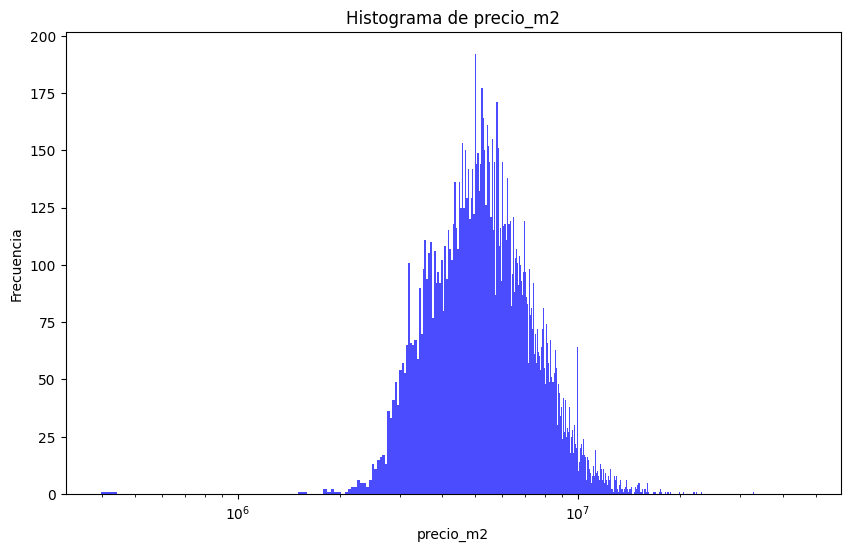

In [1411]:
import matplotlib.pyplot as plt

# Create histogram for 'precio_m2'
plt.figure(figsize=(10, 6))
plt.hist(df_piso['precio_m2'].dropna(), bins=1000, color='blue', alpha=0.7)
plt.title('Histograma de precio_m2')
plt.xscale('log')
plt.xlabel('precio_m2')
plt.ylabel('Frecuencia')
plt.show()


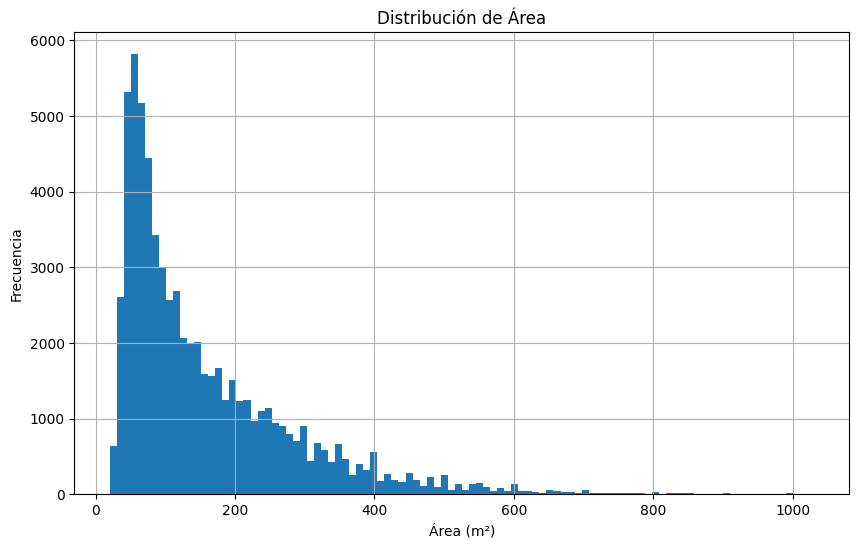

In [1412]:
import matplotlib.pyplot as plt

# Histograma para la variable 'area'
plt.figure(figsize=(10, 6))
df['area'].dropna().hist(bins=100)
plt.title('Distribución de Área')
plt.xlabel('Área (m²)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [1630]:
piso_counts = df['piso'].value_counts().sort_index()

# Display the result

display(pd.DataFrame({'piso': piso_counts.index, 'count': piso_counts.values}))

,piso,count
0,1,1551
1,2,2383
2,3,1922
3,4,2039
4,5,1973
5,6,1156
6,7,629
7,8,461
8,9,291
9,10,298


In [1457]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer

# ---------------------------------------------------------------
# df_piso contiene solo apartamentos con 'piso' válido
df = df_piso.copy()

# 1) Garantiza que las columnas numéricas sean numéricas
for col in ['precio_venta', 'area', 'latitud', 'longitud', 'habitaciones', 'banios']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [1972]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# 1) Select the features
# ---------------------------------------------------------------
features = ['area', 'precio_m2']
X = df[features].values.copy()

# ---------------------------------------------------------------
# 2) Standardize each feature (mean = 0, std = 1)
# ---------------------------------------------------------------
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# ---------------------------------------------------------------
# 3) Apply custom weights
#    - give very high importance to 'precio_m2'
#    - give high importance to 'area'
# ---------------------------------------------------------------
weights = np.ones(X_std.shape[1])
weights[features.index('area')] = 1
weights[features.index('precio_m2')] = 1

X_weighted = X_std * weights                # broadcast weights

# ---------------------------------------------------------------
# 4) Run MiniBatchKMeans with your chosen K
# ---------------------------------------------------------------
k = 12                        # set desired number of clusters
kmeans = MiniBatchKMeans(
    n_clusters=k,
    batch_size= 1400,
    random_state=42
)
df['cluster'] = kmeans.fit_predict(X_weighted)

# --------------------------------------------------------------


In [1973]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------------
# Average COP/m² increase per piso within each cluster, with counts
# ---------------------------------------------------------------
results = []

for c, grp in df[['cluster', 'piso', 'precio_venta']].dropna().groupby('cluster'):
    mean_by_piso = grp.groupby('piso')['precio_venta'].mean().sort_index()
    if len(mean_by_piso) < 2:
        continue
    
    diffs = mean_by_piso.diff().dropna()
    
    avg_diff = diffs.mean()           # average COP/m² per piso
    piso_count = len(mean_by_piso)    # number of piso levels considered
    N_cluster = len(grp)              # total records in cluster
    
    results.append({
        'cluster': c,
        'avg_Δ_COP_m2_per_piso': round(avg_diff, 0),
        'piso_levels': piso_count,
        'N': N_cluster
    })

cluster_diff_table = pd.DataFrame(results).sort_values('cluster')
display(cluster_diff_table)

# ---------------------------------------------------------------
# Compute overall (weighted) average using N as weights
# ---------------------------------------------------------------



,cluster,avg_Δ_COP_m2_per_piso,piso_levels,N
0,0,"4,564,743",34,2285
1,1,"5,763,389",25,988
2,2,"5,463,112",25,1522
3,3,"611,939",34,2245
4,4,"396,372",20,902
5,5,"-38,975,433",18,114
6,6,"249,627,067",18,160
7,7,"-3,230,509",34,2396
8,8,"-19,436,541",27,772
9,9,"-481,210",36,2287


In [1974]:

# 2) Promedio ponderado por tamaño de muestra 'N'
promedio_ponderado = (cluster_diff_table['avg_Δ_COP_m2_per_piso'] * cluster_diff_table['N']).sum() / cluster_diff_table['N'].sum()

print(f"Promedio ponderado de β₁: {promedio_ponderado:,.2f} COP/m²·piso")

Promedio ponderado de β₁: 1,452,918.45 COP/m²·piso


In [1975]:
df['area'].mean()

np.float64(103.46289325647614)

## ¿En cuánto puede llegar a variar el precio de un inmueble según el piso en el que se encuentra? 

En 1.645.631 pesos promedio

In [1813]:
print(df['area'].mean()*promedio_ponderado)

2046906.2156208374


In [1976]:
pd.set_option('display.float_format', '{:,.0f}'.format)

# 1) Asegúrate de que 'df' es tu DataFrame con 'cluster' y variables numéricas
#    (precio_venta, area, precio_m2, piso, etc.)

# 2) Mostrar 5 ejemplos por clúster
print("=== 5 Ejemplos por Clúster ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Clúster {c} ---")
    display(df[df['cluster'] == c]
            .loc[:, ['piso', 'precio_venta', 'area', 'precio_m2',
                     'latitud', 'longitud', 'habitaciones', 'banios']]
            .head(5))

# 3) Describir estadísticas por clúster
print("\n=== Estadísticas Descriptivas por Clúster ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Clúster {c} ---")
    display(df[df['cluster'] == c]
            .loc[:, ['piso', 'precio_venta', 'area', 'precio_m2',
                     'latitud', 'longitud', 'habitaciones', 'banios']]
            .describe().T)  # .T para ver variables como filas

=== 5 Ejemplos por Clúster ===

--- Clúster 0 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
4,2,"650,000,000",76,"8,552,632",5,-74,1,2
21,2,"480,000,000",73,"6,548,431",5,-74,2,2
22,3,"330,000,000",52,"6,346,154",5,-74,2,2
27,13,"798,000,000",98,"8,142,857",5,-74,3,3
54,11,"750,000,000",106,"7,075,472",5,-74,3,2



--- Clúster 1 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
20,2,"1,050,000,000",119,"8,823,529",5,-74,2,3
44,4,"1,317,875,000",145,"9,086,913",5,-74,2,4
70,4,"1,250,000,000",157,"7,961,783",5,-74,2,2
80,4,"970,000,000",130,"7,461,538",5,-74,3,5
103,3,"1,100,000,000",155,"7,096,774",5,-74,3,3



--- Clúster 2 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
13,1,"635,000,000",135,"4,687,039",5,-74,3,3
17,5,"730,000,000",162,"4,508,956",5,-74,5,4
31,4,"680,000,000",127,"5,354,331",5,-74,4,3
32,6,"650,000,000",120,"5,416,667",5,-74,3,3
33,4,"550,000,000",119,"4,621,849",5,-74,3,3



--- Clúster 3 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
2,4,"182,000,000",50,"3,640,000",5,-74,3,1
3,12,"185,000,000",49,"3,775,510",5,-74,2,1
8,2,"310,000,000",82,"3,780,488",5,-74,3,2
10,2,"150,000,000",50,"3,000,000",5,-74,2,1
14,3,"280,000,000",78,"3,589,744",5,-74,3,2



--- Clúster 4 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
6,8,"1,700,000,000",240,"7,083,333",5,-74,4,3
7,8,"1,850,000,000",237,"7,793,740",5,-74,4,4
9,4,"1,500,000,000",241,"6,224,066",5,-74,3,3
12,4,"1,250,000,000",194,"6,443,299",5,-74,3,5
34,3,"1,150,000,000",238,"4,831,933",5,-74,3,4



--- Clúster 5 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
158,8,"3,500,000,000",378,"9,259,994",5,-74,3,4
578,1,"7,200,000,000",450,"16,000,000",5,-74,4,4
579,1,"4,950,000,000",525,"9,428,571",5,-74,4,5
609,1,"7,500,000,000",445,"16,859,995",5,-74,5,5
851,11,"5,139,500,000",605,"8,495,041",5,-74,4,5



--- Clúster 6 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
110,8,"2,280,000,000",153,"14,901,961",5,-74,3,4
297,5,"3,624,233,935",208,"17,424,202",5,-74,3,4
324,6,"2,150,000,000",150,"14,377,424",5,-74,2,4
325,8,"2,280,000,000",153,"14,901,961",5,-74,3,5
360,11,"3,950,000,000",256,"15,429,688",5,-74,3,5



--- Clúster 7 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
0,5,"560,000,000",96,"5,833,333",5,-74,3,3
5,4,"350,000,000",72,"4,895,105",5,-74,3,2
16,2,"550,000,000",88,"6,250,000",5,-74,3,2
25,2,"450,000,000",120,"3,750,000",5,-74,3,2
26,6,"435,000,000",99,"4,393,939",5,-74,2,2



--- Clúster 8 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
41,1,"260,000,000",20,"13,000,000",5,-74,1,1
42,2,"850,000,000",92,"9,239,130",5,-74,4,2
52,2,"285,000,000",30,"9,500,000",5,-74,1,1
67,15,"340,000,000",38,"8,947,368",5,-74,1,2
77,2,"343,890,000",38,"9,000,000",5,-74,1,1



--- Clúster 9 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
1,5,"225,000,000",54,"4,182,156",5,-74,2,2
15,2,"330,000,000",64,"5,156,250",5,-74,3,2
24,3,"275,000,000",52,"5,319,149",5,-74,3,2
30,22,"198,000,000",38,"5,210,526",5,-74,2,1
36,1,"230,000,000",54,"4,259,259",5,-74,3,2



--- Clúster 10 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
140,2,"1,800,000,000",350,"5,144,327",5,-74,4,6
184,8,"2,100,000,000",450,"4,666,667",5,-74,4,6
237,8,"1,500,000,000",356,"4,213,483",5,-74,4,6
243,6,"1,890,000,000",287,"6,585,366",5,-74,3,4
266,3,"3,000,000,000",330,"9,090,909",5,-74,3,5



--- Clúster 11 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios
11,4,"3,350,000,000",289,"11,591,696",5,-74,3,5
19,2,"2,200,000,000",218,"10,091,743",5,-74,5,6
23,2,"4,200,000,000",344,"12,209,302",5,-74,4,4
185,8,"2,200,000,000",244,"9,016,393",5,-74,3,2
197,7,"3,500,000,000",317,"11,039,268",5,-74,4,6



=== Estadísticas Descriptivas por Clúster ===

--- Clúster 0 ---


,count,mean,std,min,25%,50%,75%,max
piso,"2,285",6,6,1,3,4,8,70
precio_venta,"2,285","464,951,261","162,412,914","156,000,000","332,000,000","456,600,000","590,000,000","800,000,000"
area,"2,285",64,21,21,47,63,80,113
precio_m2,"2,285","7,294,942","705,686","6,095,238","6,714,286","7,192,520","7,833,333","8,852,459"
latitud,"2,285",5,0,0,5,5,5,5
longitud,"2,285",-74,2,-74,-74,-74,-74,0
habitaciones,"2,285",2,1,1,1,2,3,7
banios,"2,285",2,1,1,1,2,2,4



--- Clúster 1 ---


,count,mean,std,min,25%,50%,75%,max
piso,988,5,4,1,2,4,6,48
precio_venta,988,"1,207,221,853","260,313,801","789,900,000","973,750,000","1,200,000,000","1,385,500,000","1,850,000,000"
area,988,143,27,90,121,144,164,207
precio_m2,988,"8,419,746","816,339","7,058,824","7,777,778","8,351,587","8,955,224","11,073,826"
latitud,988,5,0,0,5,5,5,5
longitud,988,-74,3,-74,-74,-74,-74,0
habitaciones,988,3,1,1,2,3,3,7
banios,988,3,1,2,3,3,4,6



--- Clúster 2 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,522",4,3,1,2,3,5,40
precio_venta,"1,522","779,686,791","149,409,391","380,000,000","675,500,000","760,000,000","880,000,000","1,200,000,000"
area,"1,522",141,21,106,123,138,156,203
precio_m2,"1,522","5,582,602","883,045","2,317,073","5,032,792","5,681,818","6,250,000","7,083,333"
latitud,"1,522",5,0,5,5,5,5,5
longitud,"1,522",-74,0,-74,-74,-74,-74,-74
habitaciones,"1,522",3,1,1,3,3,3,7
banios,"1,522",3,1,1,3,3,4,6



--- Clúster 3 ---


,count,mean,std,min,25%,50%,75%,max
piso,"2,245",5,5,1,2,4,6,59
precio_venta,"2,245","196,951,879","59,472,421","110,000,000","159,000,000","180,000,000","220,000,000","430,000,000"
area,"2,245",57,16,31,47,52,62,150
precio_m2,"2,245","3,483,234","430,139","1,560,000","3,191,489","3,547,619","3,823,529","4,200,000"
latitud,"2,245",5,0,3,5,5,5,5
longitud,"2,245",-74,0,-77,-74,-74,-74,-74
habitaciones,"2,245",3,1,1,2,3,3,5
banios,"2,245",2,1,1,1,2,2,4



--- Clúster 4 ---


,count,mean,std,min,25%,50%,75%,max
piso,902,5,4,1,2,4,6,70
precio_venta,902,"1,426,273,763","313,734,140","385,000,000","1,200,000,000","1,400,000,000","1,650,000,000","2,250,000,000"
area,902,221,26,172,200,220,241,280
precio_m2,902,"6,454,311","1,223,224","1,516,464","5,681,818","6,611,570","7,303,371","8,715,596"
latitud,902,5,0,0,5,5,5,5
longitud,902,-74,2,-74,-74,-74,-74,0
habitaciones,902,3,1,1,3,3,4,10
banios,902,4,1,1,3,4,5,6



--- Clúster 5 ---


,count,mean,std,min,25%,50%,75%,max
piso,114,5,4,1,1,5,8,18
precio_venta,114,"4,558,795,614","1,693,449,318","232,800,000","3,500,000,000","4,038,700,000","5,104,625,000","10,000,000,000"
area,114,474,87,365,404,460,512,780
precio_m2,114,"9,710,484","3,121,753","396,593","8,392,361","9,641,534","10,955,479","16,859,995"
latitud,114,5,0,5,5,5,5,5
longitud,114,-74,0,-74,-74,-74,-74,-74
habitaciones,114,4,1,2,4,4,4,6
banios,114,5,1,2,4,5,5,8



--- Clúster 6 ---


,count,mean,std,min,25%,50%,75%,max
piso,160,6,4,1,3,5,8,21
precio_venta,160,"2,982,322,085","1,748,558,135","310,000,000","1,750,000,000","2,525,000,000","3,900,000,000","8,804,000,000"
area,160,175,89,20,106,166,240,382
precio_m2,160,"16,865,472","3,456,274","13,750,000","15,096,165","15,904,169","17,584,678","46,666,667"
latitud,160,5,0,5,5,5,5,5
longitud,160,-74,0,-74,-74,-74,-74,-74
habitaciones,160,2,1,1,2,3,3,4
banios,160,3,1,1,3,3,4,5



--- Clúster 7 ---


,count,mean,std,min,25%,50%,75%,max
piso,"2,396",5,5,1,2,4,6,66
precio_venta,"2,396","463,362,833","82,694,221","330,000,000","395,000,000","450,000,000","520,000,000","690,000,000"
area,"2,396",87,14,55,76,85,97,120
precio_m2,"2,396","5,377,744","594,979","3,656,463","4,949,985","5,416,667","5,833,333","6,634,615"
latitud,"2,396",5,0,4,5,5,5,5
longitud,"2,396",-74,0,-74,-74,-74,-74,-74
habitaciones,"2,396",3,1,1,3,3,3,5
banios,"2,396",2,1,1,2,2,3,5



--- Clúster 8 ---


,count,mean,std,min,25%,50%,75%,max
piso,772,6,5,1,3,4,7,33
precio_venta,772,"711,975,383","325,213,667","180,000,000","480,000,000","655,100,000","850,000,000","1,780,000,000"
area,772,68,28,20,49,65,87,140
precio_m2,772,"10,338,967","1,212,828","8,795,181","9,387,591","10,049,432","10,935,043","15,043,478"
latitud,772,5,0,4,5,5,5,5
longitud,772,-74,0,-74,-74,-74,-74,-74
habitaciones,772,2,1,1,1,1,2,4
banios,772,2,1,1,2,2,2,5



--- Clúster 9 ---


,count,mean,std,min,25%,50%,75%,max
piso,"2,287",6,6,1,3,5,8,68
precio_venta,"2,287","252,489,731","50,453,145","120,000,001","210,000,000","250,000,000","295,000,000","350,000,000"
area,"2,287",52,11,25,43,52,60,80
precio_m2,"2,287","4,899,477","518,148","4,062,500","4,464,286","4,825,000","5,270,270","6,156,250"
latitud,"2,287",5,0,4,5,5,5,5
longitud,"2,287",-74,0,-74,-74,-74,-74,-74
habitaciones,"2,287",2,1,1,2,3,3,4
banios,"2,287",2,1,1,1,2,2,4



--- Clúster 10 ---


,count,mean,std,min,25%,50%,75%,max
piso,342,5,4,1,2,4,6,62
precio_venta,342,"2,168,532,164","493,658,195","870,000,000","1,800,000,000","2,150,000,000","2,500,000,000","3,600,000,000"
area,342,321,39,268,290,311,346,450
precio_m2,342,"6,775,923","1,408,120","2,416,667","5,794,103","6,731,512","7,936,508","10,204,082"
latitud,342,5,0,0,5,5,5,5
longitud,342,-74,4,-74,-74,-74,-74,0
habitaciones,342,4,1,2,3,4,4,9
banios,342,5,1,2,4,5,5,7



--- Clúster 11 ---


,count,mean,std,min,25%,50%,75%,max
piso,386,6,5,1,2,5,7,62
precio_venta,386,"2,597,303,368","692,737,044","1,705,000,000","2,000,000,000","2,395,000,000","2,987,500,000","5,500,000,000"
area,386,237,51,149,193,234,276,360
precio_m2,386,"10,946,252","1,431,209","8,603,774","9,901,632","10,686,641","11,853,540","15,277,778"
latitud,386,5,0,5,5,5,5,5
longitud,386,-74,0,-74,-74,-74,-74,-74
habitaciones,386,3,1,2,3,3,3,6
banios,386,4,1,2,4,4,5,7
